# 20210429 Initial Analysis

In [254]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

root_dir = "/Users/imaka/data/20210429/sta/"
root_dir = "/g/lu/data/imaka/onaga/20210429/sta/"
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Real time plots

50% EE radius = 0.300"


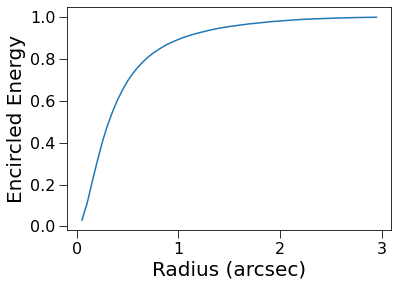

In [255]:
test_img_base = 'sta074LS_c_scan'

img, hdr = fits.getdata(root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits', header=True)
scale = util.get_plate_scale(img, hdr)


from astropy.table import Table
ee = Table.read(root_dir + 'reduce/Fld2/ee/' + test_img_base + '_clean_ee.txt', format='ascii')

plt.plot(ee['Radius'], ee['EE'])
plt.xlabel('Radius (arcsec)')
plt.ylabel('Encircled Energy')

fdx = np.where(ee['EE'] < 0.5)[0][-1]
fwhm = ee['Radius'][fdx]

print(f'50% EE radius = {fwhm:.3f}"')

Play with a star list and look at trends in FWHM, etc. 

x: fwhm_x_avg = 0.43" fwhm_x_med = 0.43" fwhm_x_std = 0.02"
x: fwhm_x_avg = 0.43" fwhm_x_med = 0.43" fwhm_x_std = 0.02"


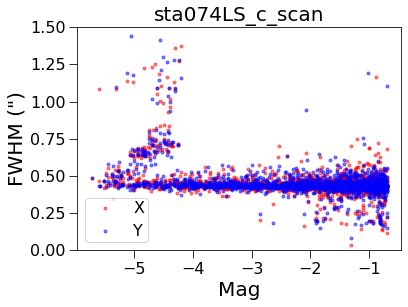

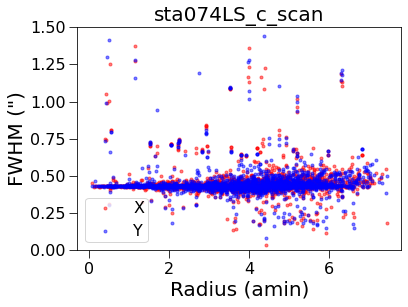

In [256]:
stars = Table.read(root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars.txt', format='ascii')


# Get the plate scale
img, hdr = fits.getdata(root_dir + 'Fld2/' + test_img_base + '.fits', header=True)
scale = util.get_plate_scale(img, hdr)
del img
del hdr

plt.figure()
plt.plot(stars['mag'], stars['x_fwhm'] * scale, 'r.', label='X', alpha=0.5)
plt.plot(stars['mag'], stars['y_fwhm'] * scale, 'b.', label='Y', alpha=0.5)
plt.xlabel('Mag')
plt.ylabel('FWHM (")')
plt.legend()
plt.ylim(0, 1.5)
plt.title(test_img_base)

plt.figure()
r = np.hypot(stars['xcentroid'] - (stars['xcentroid'].max() / 2.0), 
             stars['ycentroid'] - (stars['ycentroid'].max() / 2.0)) * scale / 60.0
plt.plot(r, stars['x_fwhm'] * scale, 'r.', label='X', alpha=0.5)
plt.plot(r, stars['y_fwhm'] * scale, 'b.', label='Y', alpha=0.5)
plt.xlabel('Radius (amin)')
plt.ylabel('FWHM (")')
plt.legend()
plt.ylim(0, 1.5)
plt.title(test_img_base)

fwhm_x_avg, fwhm_x_med, fwhm_x_std = sigma_clipped_stats(stars['x_fwhm'] * scale)
fwhm_y_avg, fwhm_y_med, fwhm_y_std = sigma_clipped_stats(stars['y_fwhm'] * scale)
print(f'x: fwhm_x_avg = {fwhm_x_avg:.2f}" fwhm_x_med = {fwhm_x_med:.2f}" fwhm_x_std = {fwhm_x_std:.2f}"')
print(f'x: fwhm_x_avg = {fwhm_x_avg:.2f}" fwhm_x_med = {fwhm_x_med:.2f}" fwhm_x_std = {fwhm_x_std:.2f}"')

In [257]:
stars2 = Table.read(root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats.fits')
print(stars.colnames)
print(stars2.colnames)



['id', 'xcentroid', 'ycentroid', 'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux', 'mag', 'x_fwhm', 'y_fwhm', 'theta']
['id', 'xcentroid', 'ycentroid', 'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux', 'mag', 'x_fwhm', 'y_fwhm', 'theta', 'ee25_rad', 'ee50_rad', 'ee80_rad', 'nea2', 'nea', 'fwhm_emp']


Text(0, 0.5, 'Emp. FWHM (")')

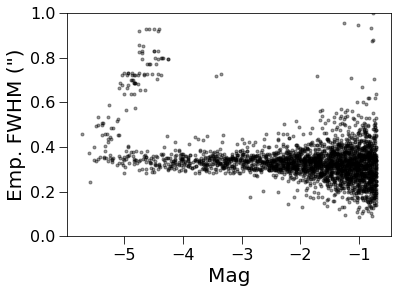

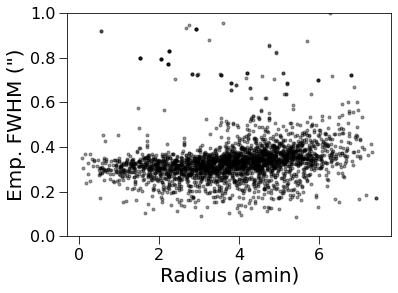

In [258]:
plt.figure()
plt.plot(stars2['mag'], stars2['fwhm_emp'] * scale, 'k.', alpha=0.4)
plt.ylim(0, 1)
plt.xlabel('Mag')
plt.ylabel('Emp. FWHM (")')

plt.figure()
r = np.hypot(stars2['xcentroid'] - (stars2['xcentroid'].max() / 2.0), 
             stars2['ycentroid'] - (stars2['ycentroid'].max() / 2.0)) * scale / 60.0
plt.plot(r, stars2['fwhm_emp'] * scale, 'k.', alpha=0.4)
plt.ylim(0, 1)
plt.xlabel('Radius (amin)')
plt.ylabel('Emp. FWHM (")')

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std', 'DIMM', 'DIMM_dt_hr', 'MASS', 'MASS_dt_hr', 'Cn2dh_005', 'Cn2dh_010', 'Cn2dh_020', 'Cn2dh_040', 'Cn2dh_080', 'Cn2dh_160', 'Cn2dh_dt_hr', 'Moffat FWHM']


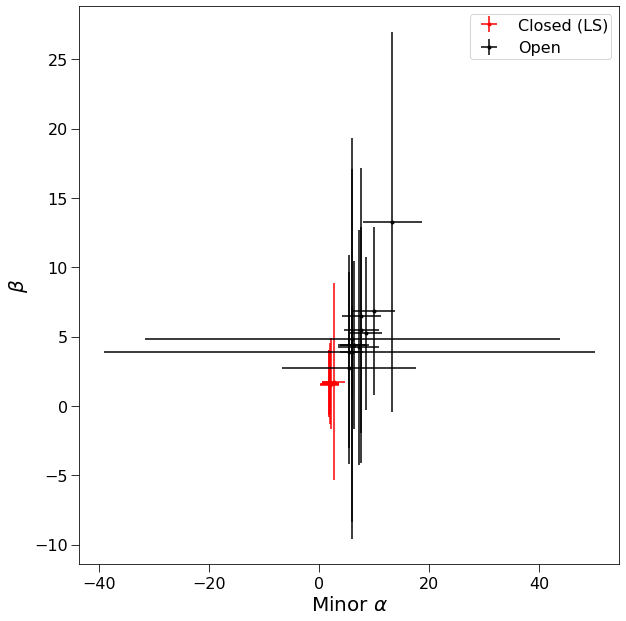

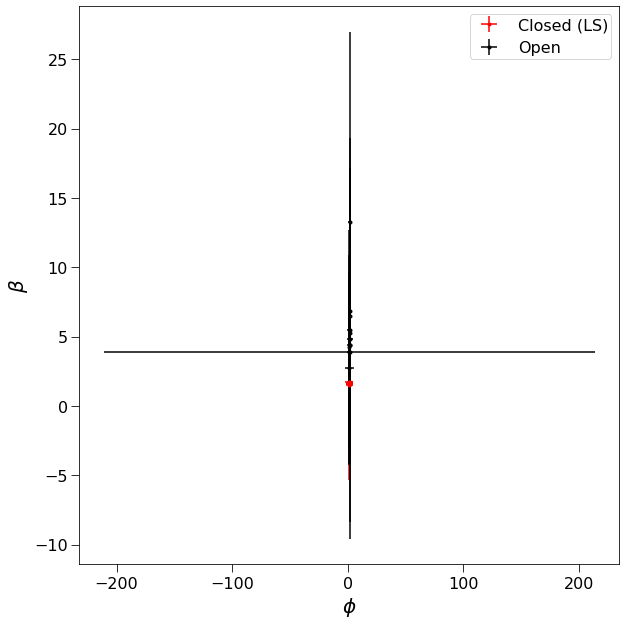

In [259]:
stats_c = Table.read(root_dir + 'reduce/stats/stats_LS_mdp.fits')
stats_o = Table.read(root_dir + 'reduce/stats/stats_open_mdp.fits')

print(stats.colnames)

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Minor Alpha'], stats_c['Beta'], xerr=stats_c['Minor Alpha std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Minor Alpha'], stats_o['Beta'], xerr=stats_o['Minor Alpha std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'Minor $\alpha$')
plt.ylabel(r'$\beta$')
plt.legend()

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Phi'], stats_c['Beta'], xerr=stats_c['Phi std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Phi'], stats_o['Beta'], xerr=stats_o['Phi std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\beta$')
plt.legend()



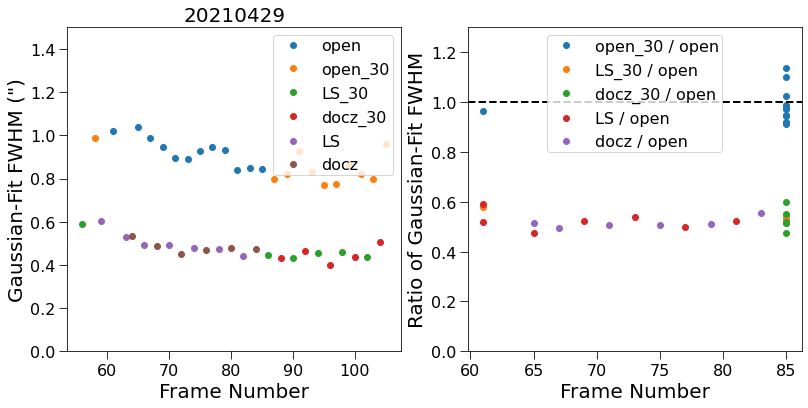

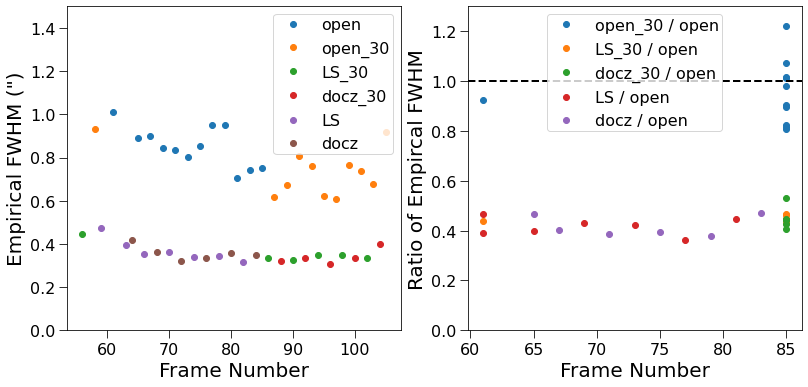

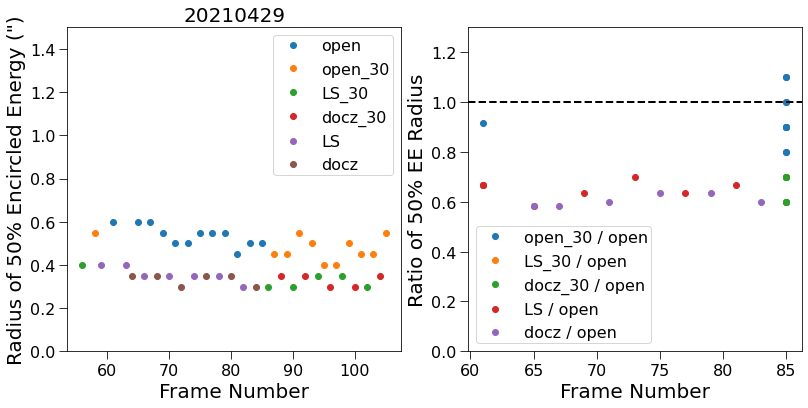

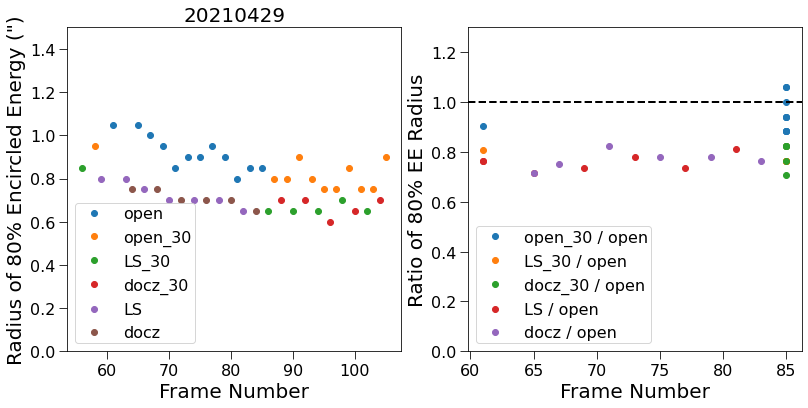

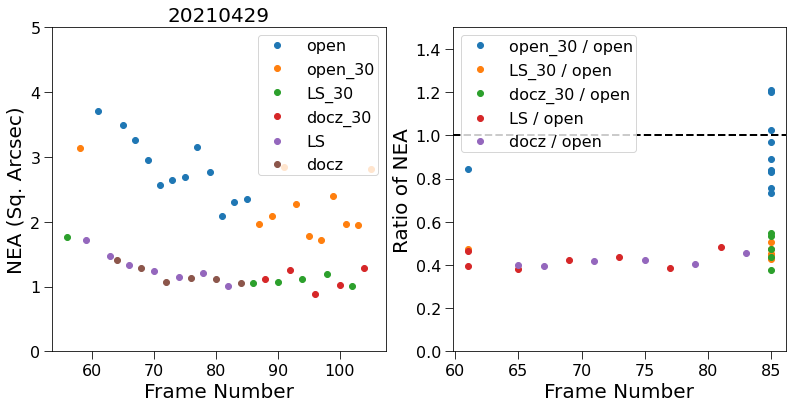

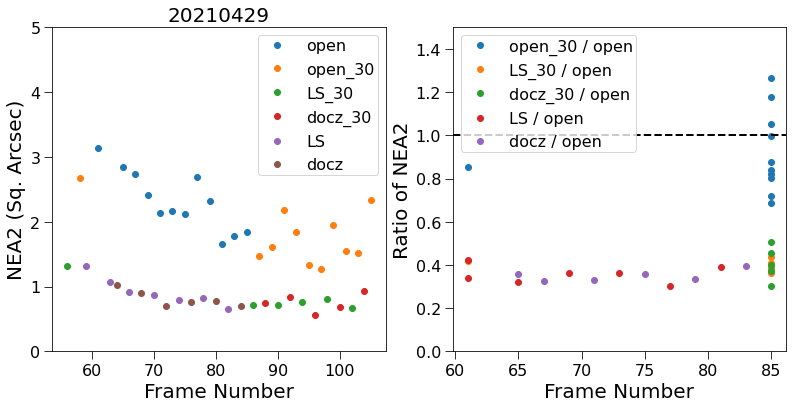

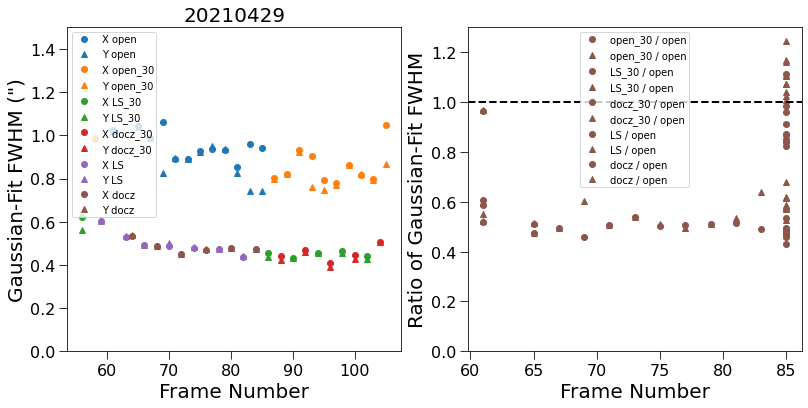

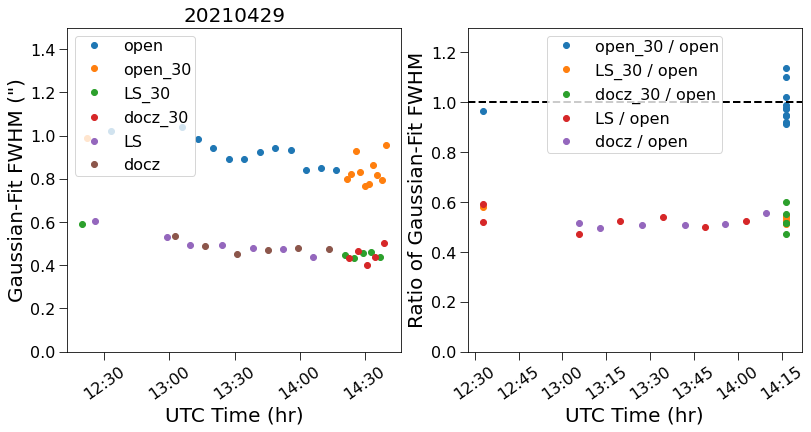

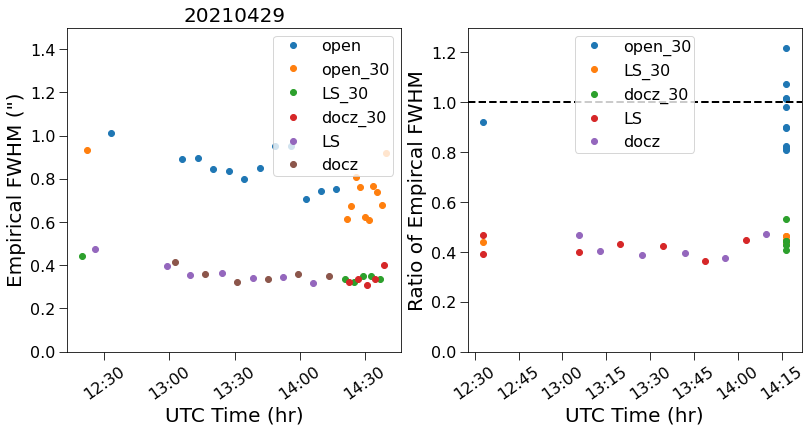

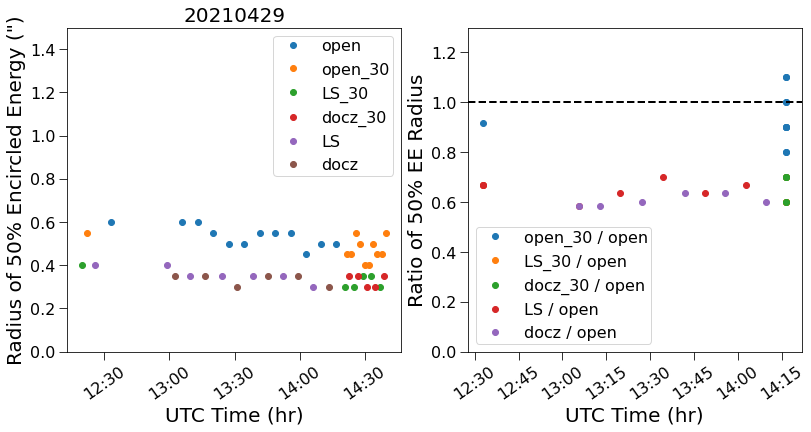

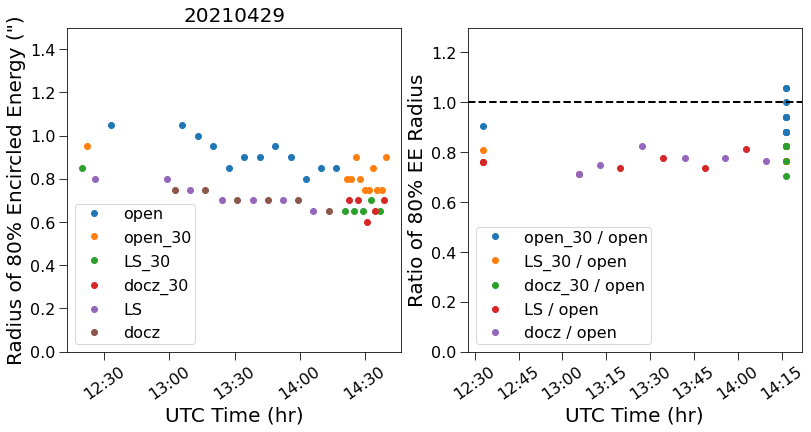

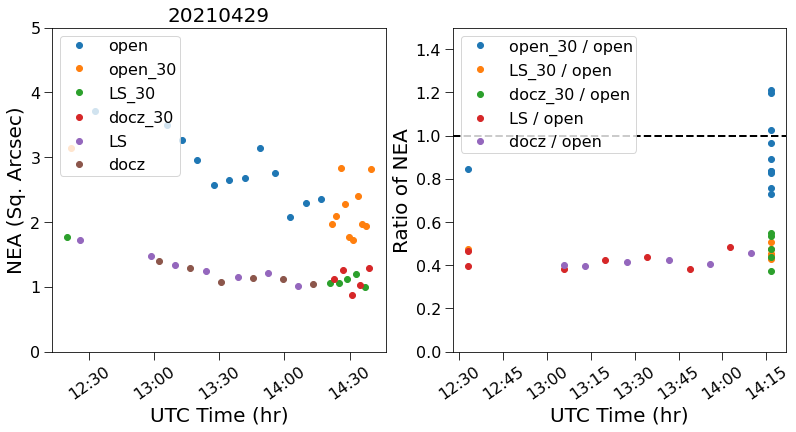

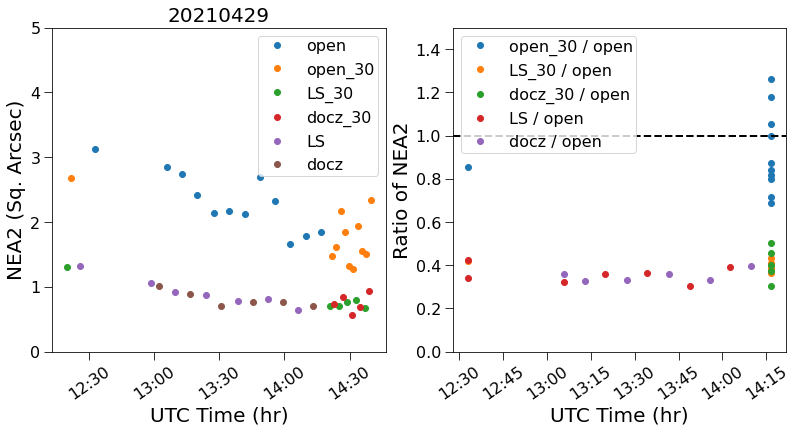

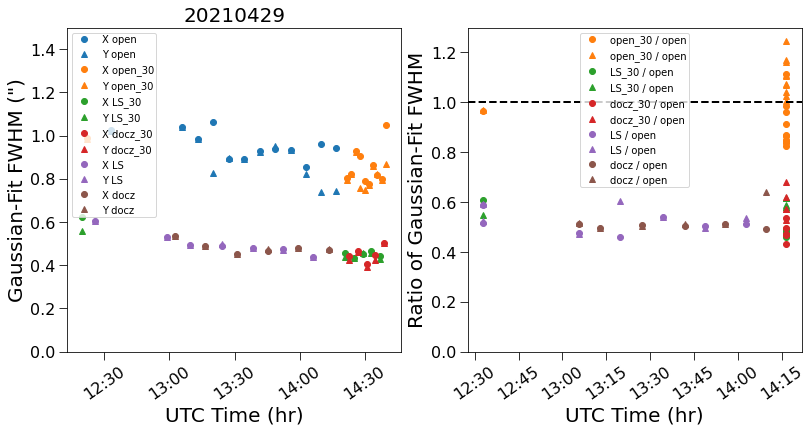

In [260]:
suffixes = ['open', 'open_30', 'LS_30', 'docz_30', 'LS', 'docz']
plot_stats.plot_stack_stats('20210429', suffixes=suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

In [261]:
suffixes = ['open', 'open_30', 'LS_30', 'docz_30', 'LS', 'docz']
for suf in suffixes:
    stats_file = stats_dir + 'stats_' + suf + '_mdp.fits'
    stats = Table.read(stats_file)
    
    stats['Moffat FWHM'] = 2.0 * stats['Minor Alpha'] * np.sqrt((2.0**(1. / stats['Beta'])) - 1)

    print()
    print()
    print('*** ' + suf + ' ***')
    print(stats_file)
    print(stats.meta)

    print('Gaussian  FWHM = {0:.3f}"'.format(np.mean(stats['FWHM']) * scale))
    print('Empirical FWHM = {0:.3f}"'.format(np.mean(stats['emp_fwhm']) * scale))
    print('Moffat    FWHM = {0:.3f}"'.format(np.mean(stats['Moffat FWHM']) * scale))
    print()
    print('DIMM = {0:.3f}"'.format(np.mean(stats['DIMM'])))
    print('MASS = {0:.3f}"'.format(np.mean(stats['MASS'])))
    print()
    print('r_EE50 = {0:.3f}"'.format(np.mean(stats['EE50'])))
    print('NEA    = {0:.3f} sq. asec'.format(np.mean(stats['NEA'])))
    print('Beta   = {0:.3f}'.format(np.mean(stats['Beta'])))




*** open ***
/g/lu/data/imaka/onaga/20210429/sta/reduce/stats/stats_open_mdp.fits
OrderedDict([('NAME', 'Stats Table'), ('SCALE', 0.126)])
Gaussian  FWHM = 0.926"
Empirical FWHM = 0.853"
Moffat    FWHM = 0.703"

DIMM = 0.571"
MASS = 0.100"

r_EE50 = 0.538"
NEA    = 178.160 sq. asec
Beta   = 5.466


*** open_30 ***
/g/lu/data/imaka/onaga/20210429/sta/reduce/stats/stats_open_30_mdp.fits
OrderedDict([('NAME', 'Stats Table'), ('SCALE', 0.126)])
Gaussian  FWHM = 0.849"
Empirical FWHM = 0.738"
Moffat    FWHM = 0.647"

DIMM = 0.492"
MASS = 0.148"

r_EE50 = 0.477"
NEA    = 142.712 sq. asec
Beta   = 4.878


*** LS_30 ***
/g/lu/data/imaka/onaga/20210429/sta/reduce/stats/stats_LS_30_mdp.fits
OrderedDict([('NAME', 'Stats Table'), ('SCALE', 0.126)])
Gaussian  FWHM = 0.470"
Empirical FWHM = 0.356"
Moffat    FWHM = 0.365"

DIMM = 0.507"
MASS = 0.153"

r_EE50 = 0.333"
NEA    = 75.484 sq. asec
Beta   = 1.705


*** docz_30 ***
/g/lu/data/imaka/onaga/20210429/sta/reduce/stats/stats_docz_30_mdp.fits
Ord

# Time Variation w/MASS-DIMM

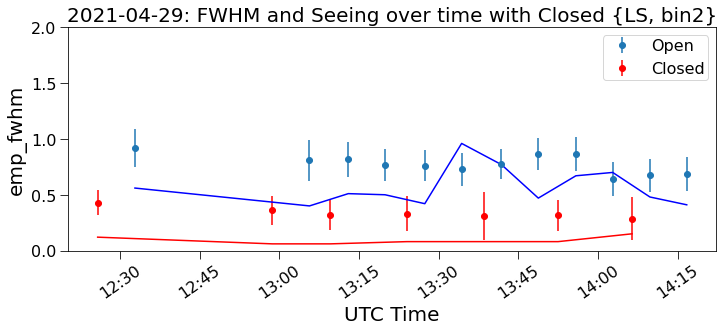

In [262]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2021-04-29: FWHM and Seeing over time with Closed {LS, bin2}", plots_dir)

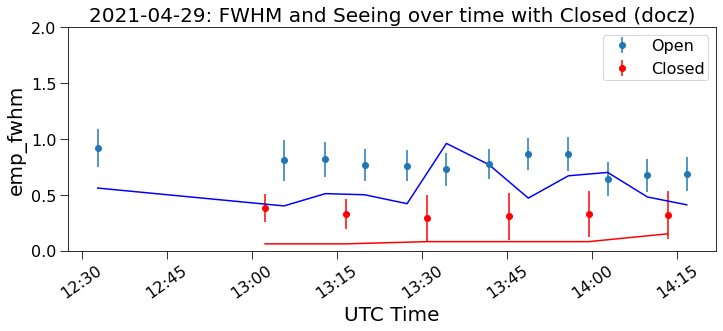

In [263]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file2 = stats_dir+ "stats_docz_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', "2021-04-29: FWHM and Seeing over time with Closed (docz)", plots_dir)

# Aggregate Plots

['/g/lu/data/imaka/onaga/20210429/sta/reduce/stats/stats_open_mdp.fits', '/g/lu/data/imaka/onaga/20210429/sta/reduce/stats/stats_open_30_mdp.fits', '/g/lu/data/imaka/onaga/20210429/sta/reduce/stats/stats_LS_30_mdp.fits', '/g/lu/data/imaka/onaga/20210429/sta/reduce/stats/stats_docz_30_mdp.fits', '/g/lu/data/imaka/onaga/20210429/sta/reduce/stats/stats_LS_mdp.fits', '/g/lu/data/imaka/onaga/20210429/sta/reduce/stats/stats_docz_mdp.fits']


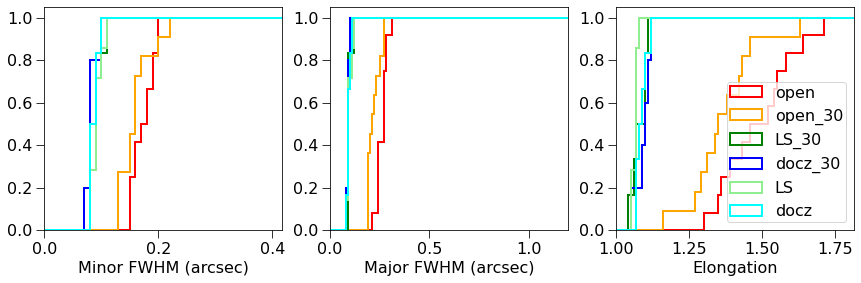

In [264]:
files = [stats_dir + 'stats_' + suffix + '_mdp.fits' for suffix in suffixes]
print(files)
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, suffixes, colors)

# Field Variability

## Closed loop, single exposure

sta074LS_c_scan
Median FWHM           = 0.341"
Median FWHM (clipped) = 0.341"
Mean FWHM             = 0.355"
Mean FWHM (clipped)   = 0.341"
Stddev FWHM           = 0.384"
Stddev FWHM (clipped) = 0.013"


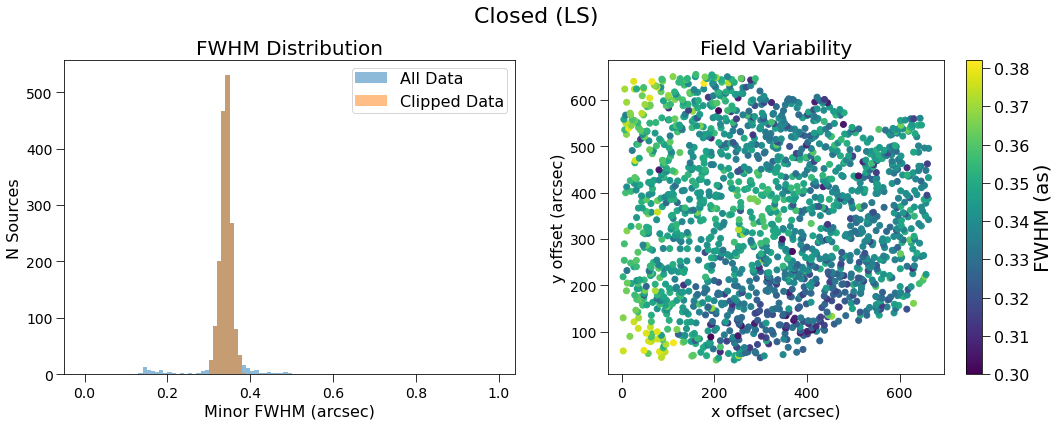

In [265]:
from importlib import reload
reload(plot_stats)
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "Closed (LS)")

### Closed loop (Bin 2)

In [268]:
img_file = stack_dir + 'fld2_stack_LS_c.fits' 
starlist = stack_dir + 'fld2_stack_LS_c_stars.txt'
plot_stats.plot_var(img_file, starlist, "Closed (B2)")

RuntimeError: Table must include pre-calculate Moffat fits

### Closed (LS)

N Stars:  195
Mean:  0.40665554179242963
Median:  0.407779774701715
Std Dev:  0.015858138216178444


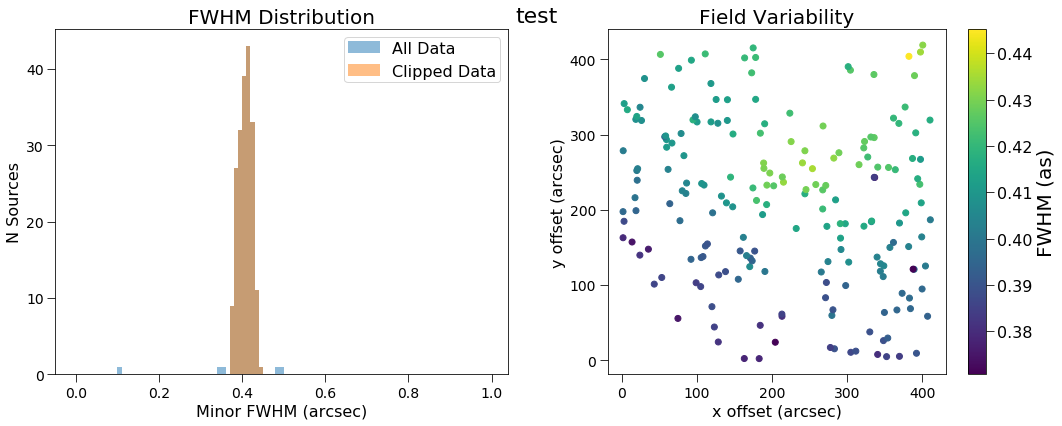

In [8]:
img_file = stack_dir + "orion_stack_closed_LS.fits"
starlist = stack_dir + "orion_stack_closed_LS_stars.txt"
plot_stats.plot_var(img_file, starlist, "Closed (LS)")